<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/PRUB_DE_CORRIDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P R U E B A - D E - C O R R I D A S


---


La prueba de corridas es una técnica estadística utilizada para evaluar la aleatoriedad en una secuencia de datos binarios o dicotómicos, es decir, datos que solo pueden tomar dos valores posibles, como "éxito" o "fracaso", "sí" o "no", "positivo" o "negativo", etc.

La idea detrás de la prueba de corridas es examinar si los datos exhiben un patrón sistemático de alternancia entre los dos valores o si las ocurrencias de un valor son agrupadas o dispersas de manera inusual. Esta prueba es particularmente útil en el análisis de datos secuenciales, como series temporales o resultados de experimentos binarios.


---

* PASOS
1. Identificamos los dos valores posibles que pueden tomar los datos, como "éxito" o "fracaso".
2. Contamos las corridas, donde una corrida es una secuencia consecutiva de datos que son todos iguales. Por ejemplo, en una secuencia de datos binarios "1011010010", hay cinco corridas: una de longitud 1 (0), dos de longitud 2 (10 y 10), una de longitud 3 (101) y una de longitud 4 (1001).
3. Calcularemos el estadístico de la prueba, el cual se calcula en función del número observado de corridas y el número esperado de corridas bajo la hipótesis nula de aleatoriedad.
4. Comparamos el valor calculado del estadístico con un valor crítico obtenido de tablas estadísticas ( en este caso una normal) para determinar si existe evidencia suficiente para rechazar la hipótesis nula de aleatoriedad.


---

# EJERCICIO 1
* Realice una prueba de corridas con un nivel de aceptación del 95 %

                   0.048 0.591 0.478 0.166 0.932
                   0.926 0.007 0.551 0.362 0.533
                   0.368 0.437 0.178 0.411 0.545
                   0.787 0.594 0.086 0.951 0.772
                   0.298 0.199 0.157 0.401 0.631

In [5]:
print("           P R U E B A    D E                ")
print("             C O R R I D A S                 ")
print("---------------------------------------------------")

# Ingresamos los datos de nuestra muestra

datos=[0.048, 0.591, 0.478, 0.166, 0.932,
       0.926, 0.007, 0.551, 0.362, 0.533,
       0.368, 0.437, 0.178, 0.411, 0.545,
       0.787, 0.594, 0.086, 0.951, 0.772,
       0.298, 0.199, 0.157, 0.401, 0.631]

# Contamos el tamaño de la muestra
n = len(datos)

# Inicializamos un arreglo, para almacenar cada cada comparación realizada
comparaciones = []

# Creamos un for que nos ayudara a asignar "0" si x_i <= x_i+1 o "1" si sucede lo contrario
for i in range(len(datos) - 1):
    if datos[i] < datos[i+1]:
        comparaciones.append(1)
    else:
        comparaciones.append(0)


# Inicializamos otro arreglo para contar la longitud
longitud = []
contador = 1

# Este for nos ayuda a contar cuntas veces se repide un 1 o un 0 consecutivamente
for i in range(len(comparaciones) - 1):
    if comparaciones[i] == comparaciones[i+1]:
        contador += 1
    else:
        longitud.append(contador)
        contador = 1

longitud.append(contador)

# Contamos el total de corridas obtenidas
corridas=len(longitud)

print( "          D A T O S   O B T E N I D O S          ")
print("-"*52)
# Calculamos el valor esperado
mu = round(((2*n)-1)/3 , 4)
print("* Valor de la Media =",mu)

# Calculamos la varianza
var = round((16*n-29)/90,4)
print("* Valor de la Varianza = ",var)

# Calculando el estadistico de prueba
import math
z = round((corridas - mu) / math.sqrt(var),4)
print("* Valor de Z =",z)

# Buscamos el valor critico
from scipy.stats import norm

# Nivel de significancia (alfa)
alfa = 0.95  # Para un nivel de significancia del 95%

# Calcular el valor crítico para la distribución normal estándar
valor_critico = round(norm.ppf((1 - alfa)/2),4)

print("* Valor crítico para", alfa, " = ", valor_critico)

valor_superior = valor_critico*(-1)
valor_inferior = valor_critico

# Comparamos el estadictico de prueba con el v alor critico
print("\n")
print( "             C O N C L U S I O N         ")
if valor_inferior <= z <= valor_superior:
    text1="Aceptamos la hipotesis nula (Ho) dado que {} <= {} <= {}".format(valor_inferior,z,valor_superior)
    text2="Conclusión: Los datos siguen un patrón aleatorio en términos de la ocurrencia de las corridas."
    longitud_cuadro = max(len(text1), len(text2)) + 4
    print("*" * longitud_cuadro)
    print(f"* {text1} *")
    print(f"* {text2} *")
    print("*" * longitud_cuadro)
else:
    text1="Rechazamos la hipotesis nula (Ho) dado que {} <= {} <= {}".format(valor_inferior,z,valor_superior)
    text2="Conclusión: Los datos NO siguen un patrón aleatorio en términos de la ocurrencia de las corridas."
    longitud_cuadro = max(len(text1), len(text2)) + 4
    print("*" * longitud_cuadro)
    print(f"* {text1} *")
    print(f"* {text2} *")
    print("*" * longitud_cuadro)


# Tabulamos los resultados
from tabulate import tabulate
# Primera tabla (A)
tabla_A = [[datos[i], comparaciones[i]] for i in range(n-1)]
encabezado_A = ["x_i", "Valor(1) o (0)"]
tabla_A.insert(0, encabezado_A)


# Segunda tabla (B)
tabla_B = [[j+1, longitud[j]] for j in range(min(corridas,len(longitud)))]
encabezado_B = ["Corrida", "Longitud"]
tabla_B.insert(0, encabezado_B)

# Imprimir las tablas una al lado de la otra
print("\n")
print("-"*11, "T A B L A  1  D E  R E S U L T A D O S", "-"*11)
print("         valores de la muetsra y definiendo signo       ")
print("\n")
print(tabulate(tabla_A, headers="firstrow", tablefmt="fancy_grid"))
print("\n")
print("-"*11, "T A B L A  2  D E  R E S U L T A D O S", "-"*11)
print("           definiendo la longitud de las corridas      ")
print("\n")
print(tabulate(tabla_B, headers="firstrow", tablefmt="fancy_grid"))


           P R U E B A    D E                
             C O R R I D A S                 
---------------------------------------------------
          D A T O S   O B T E N I D O S          
----------------------------------------------------
* Valor de la Media = 16.3333
* Valor de la Varianza =  4.1222
* Valor de Z = -0.6567
* Valor crítico para 0.95  =  -1.96


             C O N C L U S I O N         
**************************************************************************************************
* Aceptamos la hipotesis nula (Ho) dado que -1.96 <= -0.6567 <= 1.96 *
* Conclusión: Los datos siguen un patrón aleatorio en términos de la ocurrencia de las corridas. *
**************************************************************************************************


----------- T A B L A  1  D E  R E S U L T A D O S -----------
         valores de la muetsra y definiendo signo       


╒═══════╤══════════════════╕
│   x_i │   Valor(1) o (0) │
╞═══════╪══════════════════╡
│ 0.048 

#EJERCICIO 2
* Realice las tres pruebas estudiadas hasta ahora a esta muestra, con un nivel de aceptación de 95 %.


            0.78 0.98 0.24 0.73 0.43 0.16 0.78 0.47 0.18 0.55
            0.04 0.29 0.68 0.77 0.16 0.03 0.79 0.22 0.37 0.80
            0.96 0.26 0.91 0.55 0.75 0.55 0.64 0.39 0.53 0.45
            0.61 0.14 0.38 0.12 0.40 0.74 0.78 0.98 0.27 0.60
            0.43 0.67 0.62 0.32 0.53 0.54 0.24 0.29 0.18 0.08
            0.82 0.94 0.19 0.98 0.41 1.00 0.74 0.92 0.14 0.43
            0.83 0.88 0.18 0.21 0.50 0.13 0.43 0.69 0.08 0.12
            0.22 0.50 0.16 0.11 0.18 0.89 0.80 0.42 0.29 0.87
            0.83 0.79 0.65 0.28 0.78 0.49 0.36 0.86 0.87 0.64
            0.51 0.07 0.18 0.94 0.50 0.22 0.66 0.91 0.48 0.24

* PRUEBA DE BONDAD DE AJUSTE

    P R U E B A  D E  B O N D A D  D E   
                A J U S T E                  
-------------------------------------------------------------------------

 LOS RESULTADOS SE MUESTRAN ACONTINUACIÓN : 

╒═════════════╤══════╤══════╤═════════╤═════════════╤════════════════╕
│ Clases      │   fo │   fe │   fo-fe │   (fo-fe)^2 │   (fo-fe)^2/fe │
╞═════════════╪══════╪══════╪═════════╪═════════════╪════════════════╡
│ (0.01-0.20) │   20 │   20 │       0 │           0 │           0    │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.21-0.40) │   19 │   20 │      -1 │           1 │           0.05 │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.41-0.60) │   21 │   20 │       1 │           1 │           0.05 │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.61-0.80) │   22 │   20 │       2 │           4 │           0.2  │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.81-1.

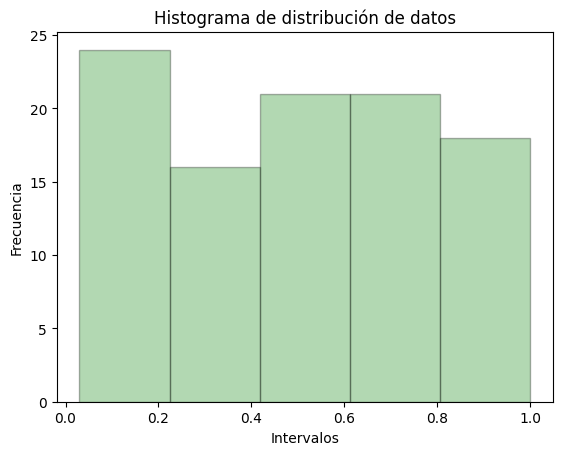

In [7]:
print("    P R U E B A  D E  B O N D A D  D E   ")
print("                A J U S T E                  ")
print("-------------------------------------------------------------------------")

# Ingresamos los datos de nuestra muestra de números aleatorios
datos = [0.78, 0.98, 0.24, 0.73, 0.43, 0.16, 0.78, 0.47, 0.18, 0.55,
         0.04, 0.29, 0.68, 0.77, 0.16, 0.03, 0.79, 0.22, 0.37, 0.80,
         0.96, 0.26, 0.91, 0.55, 0.75, 0.55, 0.64, 0.39, 0.53, 0.45,
         0.61, 0.14, 0.38, 0.12, 0.40, 0.74, 0.78, 0.98, 0.27, 0.60,
         0.43, 0.67, 0.62, 0.32, 0.53, 0.54, 0.24, 0.29, 0.18, 0.08,
         0.82, 0.94, 0.19, 0.98, 0.41, 1.00, 0.74, 0.92, 0.14, 0.43,
         0.83, 0.88, 0.18, 0.21, 0.50, 0.13, 0.43, 0.69, 0.08, 0.12,
         0.22, 0.50, 0.16, 0.11, 0.18, 0.89, 0.80, 0.42, 0.29, 0.87,
         0.83, 0.79, 0.65, 0.28, 0.78, 0.49, 0.36, 0.86, 0.87, 0.64,
         0.51, 0.07, 0.18, 0.94, 0.50, 0.22, 0.66, 0.91, 0.48, 0.24]

# Definimos la cantidad de clases deseadas
clases = 5
f1 = 0
f2 = 0
f3 = 0
f4 = 0
f5 = 0
i = 0

# Comparamos los datos de nuestra muestra en cada clase definida
for i in range(100):
    if 0.01 <= datos[i] <= 0.20:
        f1 = f1+ 1
    elif 0.21 <= datos[i] <= 0.40:
        f2 = f2 + 1
    elif 0.41 <= datos[i] <= 0.60:
        f3 = f3 + 1
    elif 0.61 <= datos[i] <= 0.80:
        f4 = f4 + 1
    elif 0.81 <= datos[i] <= 1:
        f5 = f5 + 1

# Calcualmos la frecuencia esperada fe
frec = [f1,f2,f3,f4,f5]
fe = len(datos)/clases
fes = [20,20, 20, 20, 20]
fofe = []
fofe_2 = []
fofe_2_fe = []
for i in range(5):
  fofe.insert(i,frec[i]-fe)
  fofe_2.insert(i,fofe[i]**2)
  fofe_2_fe.insert(i,fofe_2[i]/fe)

print("\n LOS RESULTADOS SE MUESTRAN ACONTINUACIÓN : \n")

# Damos formato a una tabla para imprimir los resultados
inter = ["(0.01-0.20)", "(0.21-0.40)", "(0.41-0.60)","(0.61-0.80)", "(0.81-1.00)"]

A = [[inter[i],frec[i],fes[i], fofe[i],fofe_2[i], fofe_2_fe[i]] for i in range(5)]
head = ["Clases","fo","fe","fo-fe", "(fo-fe)^2", "(fo-fe)^2/fe"]
A.insert(0,head)

from tabulate import tabulate

# Imprimimos los datos en formato de tabla
print(tabulate(A, headers="firstrow", tablefmt="fancy_grid"))
print("-------------------------------------------------------------------------\n")

# Sumar los elementos
suma=sum(fofe_2_fe[i] for i in range(5))
print("Valor del estadistico de prueba: ",suma)

from scipy.stats import chi2
# Grados de libertad
grados_libertad = clases - 1

# Nivel de confianza (95% / 100= 0.95)
nivel_confianza = 0.95

# Calcular el valor crítico de chi-cuadrada para el nivel de confianza dado
valc = chi2.ppf(nivel_confianza, grados_libertad)
valor_critico = round(valc, 1)
print("Valor crítico de chi-cuadrada: ", valor_critico)
print("-------------------------------------------------------------------------\n")

# Determinamos se se rechaza o acepta la hipoteses
print("\n                R E S U L T A D O    F I N A L                ")
if suma <= valor_critico:
  text1="Aceptamos la hipotesis nula (Ho) dado que {} <= {}".format(suma,valor_critico)
  text2="Los datos pueden seguir una distribución uniforme"
  text3="Conclusión: No existe diferencia entre las proporciones de los datos."
  longitud_cuadro = max(len(text1), len(text2),len(text3)) + 4
  print("*" * longitud_cuadro)
  print(f"* {text1} *")
  print(f"* {text2} *")
  print(f"{text3}")
  print("*" * longitud_cuadro)
elif suma > valor_critico:
  text1="Rechazamos la hipotesis nula (Ho) dado que {} > {}".format(suma,valor_critico)
  text2="Los datos no siguen una distribución uniforme"
  text3="Conclusión: Existe diferencia entre las proporciones de los datos."
  longitud_cuadro = max(len(text1), len(text2),len(text3)) + 4
  print("*" * longitud_cuadro)
  print(f"* {text1} *")
  print(f"* {text2} *")
  print(f" {text3} ")
  print("*" * longitud_cuadro)

# Realizamos un histograma para ver el comportamiento de los datos
import matplotlib.pyplot as plt
print(" \n Los datos se ven reflejados en el siguiente histograma: \n")
plt.hist(datos, bins=clases, color='green', edgecolor='black', alpha=0.3)
plt.title('Histograma de distribución de datos')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.show()


* PRUEBA DE KOLMOGOROV

In [25]:
print("                P R U E B A   D E                 ")
print("               K O L M O G O R O V                  ")
print("----------------------------------------------------")

import math
# Ingresamos los datos de nuestra muestra de números aleatorios
datos = [0.78, 0.98, 0.24, 0.73, 0.43, 0.16, 0.78, 0.47, 0.18, 0.55,
         0.04, 0.29, 0.68, 0.77, 0.16, 0.03, 0.79, 0.22, 0.37, 0.80,
         0.96, 0.26, 0.91, 0.55, 0.75, 0.55, 0.64, 0.39, 0.53, 0.45,
         0.61, 0.14, 0.38, 0.12, 0.40, 0.74, 0.78, 0.98, 0.27, 0.60,
         0.43, 0.67, 0.62, 0.32, 0.53, 0.54, 0.24, 0.29, 0.18, 0.08,
         0.82, 0.94, 0.19, 0.98, 0.41, 1.00, 0.74, 0.92, 0.14, 0.43,
         0.83, 0.88, 0.18, 0.21, 0.50, 0.13, 0.43, 0.69, 0.08, 0.12,
         0.22, 0.50, 0.16, 0.11, 0.18, 0.89, 0.80, 0.42, 0.29, 0.87,
         0.83, 0.79, 0.65, 0.28, 0.78, 0.49, 0.36, 0.86, 0.87, 0.64,
         0.51, 0.07, 0.18, 0.94, 0.50, 0.22, 0.66, 0.91, 0.48, 0.24]

# Ordenamos nuestros datos de menor a mayor
datos.sort()
n = len(datos)
alpha = 0.05
D1=[]
D2 =[]
i = 0
j = 1

# Calculamos nuestra D+ y D-
for i in range(n):
  D1.insert(i,abs(j/n-datos[i])) # D+
  D2.insert(i,abs(datos[i]-(j-1)/n)) #D-
  j = j+1

# Calculamos el valor máximo de D+ y D-
max_d1 = round(max(D1),4)
max_d2 = round(max(D2),4)

# Calculamos el valor máximo entre D+ y D-
D = max(max_d1, max_d2)

# Ingresamos los datos del TEST DE KOLMOGOROV‐SMIRNOV para obtener el valor crítico
kolmogorov = [
    [0.3027, 0.3216, 0.3456, 0.3754, 0.4129],
    [0.2893, 0.3027, 0.3188, 0.3427, 0.3959],
    [0.2694, 0.2816, 0.2982, 0.3245, 0.3728],
    [0.2521, 0.2641, 0.2802, 0.3041, 0.3504],
    [0.2387, 0.2502, 0.2649, 0.2875, 0.3331],
    [0.2273, 0.2382, 0.2522, 0.2744, 0.3162],
    [0.2171, 0.2273, 0.241, 0.2616, 0.3037],
    [0.208, 0.2179, 0.2306, 0.2506, 0.2905],
    [0.2004, 0.2101, 0.2228, 0.2426, 0.2812],
    [0.1932, 0.2025, 0.2147, 0.2337, 0.2714],
    [0.1869, 0.1959, 0.2077, 0.2257, 0.2627],
    [0.1811, 0.1899, 0.2016, 0.2196, 0.2545],
    [0.1758, 0.1843, 0.1956, 0.2128, 0.2477],
    [0.1711, 0.1794, 0.1902, 0.2071, 0.2408],
    [0.1666, 0.1747, 0.1852, 0.2018, 0.2345],
    [0.1624, 0.17, 0.1803, 0.1965, 0.2285],
    [0.1589, 0.1666, 0.1764, 0.192, 0.2226],
    [0.1429, 0.1498, 0.1589, 0.1726, 0.201],
    [0.1315, 0.1378, 0.146, 0.159, 0.1848],
    [0.1291, 0.1353, 0.1432, 0.1559, 0.182],
    [0.1274, 0.1336, 0.1415, 0.1542, 0.1798],
    [0.1254, 0.1314, 0.1392, 0.1518, 0.177],
    [0.1236, 0.1295, 0.1373, 0.1497, 0.1747],
    [0.122, 0.1278, 0.1356, 0.1478, 0.172],
    [0.1203, 0.126, 0.1336, 0.1454, 0.1695],
    [0.1188, 0.1245, 0.132, 0.1436, 0.1677],
    [0.1174, 0.123, 0.1303, 0.1421, 0.1653],
    [0.1159, 0.1214, 0.1288, 0.1402, 0.1634],
    [0.1147, 0.1204, 0.1275, 0.1386, 0.1616],
    [0.1131, 0.1186, 0.1258, 0.1373, 0.1599],
    [0.1119, 0.1172, 0.1244, 0.1353, 0.1573],
    [0.1106, 0.1159, 0.1228, 0.1339, 0.1556],
    [0.1095, 0.1148, 0.1216, 0.1322, 0.1542],
    [0.1083, 0.1134, 0.1204, 0.1309, 0.1525],
    [0.1071, 0.1123, 0.1189, 0.1293, 0.1512],
    [0.1062, 0.1113, 0.118, 0.1282, 0.1499],
    [0.1047, 0.1098, 0.1165, 0.1269, 0.1476],
    [0.104, 0.1089, 0.1153, 0.1256, 0.1463],
    [0.103, 0.1079, 0.1142, 0.1246, 0.1457]
]

# Definimos los niveles de significancia
significancia = [0.20, 0.25,0.10,0.05,0.01]
tamaño1 = list(range(4,21)) #[4,5,...,21]
a = [25]
tamaño1.extend(a)
tamaño2 = list(range(30,51))
tamañoA = tamaño1 + tamaño2

# Si nuestra muestra es <= a 50 , obtenemos el valor de la tabla kolmogorov
if n <= 50:
# Comparamos el tamaño de muestra con el nivel de significancia
 i = 0
 for i in range(len(significancia)):
   if significancia[i] == alpha:
     col = i
 i = 0
 for i in range(len(tamañoA)):
   if tamañoA[i] == n:
     fil = i

 # Obtenemos el valor crítico de nuestra tabla
 d_alpha = kolmogorov[fil][col]

# Si nuestra muestra en > 50 entonces
else:
 tamañoB = {
    0.20: 0.724165 / math.sqrt(n),
    0.25: 0.758905 / math.sqrt(n),
    0.10: 0.8043545 / math.sqrt(n),
    0.05: 0.875897 / math.sqrt(n),
    0.01: 1.0210785 / math.sqrt(n)
   }

 # Obtenemos el valor crítico
 d_alpha = tamañoB[alpha]

# Obtenemos resultados
print( "          D A T O S   O B T E N I D O S          ")
print("-"*52)
print(" * Valor de 'D+' = ", max_d1)
print(" * Valor de 'D-' = ", max_d2)
print(" * Valor de 'D' = max{D+,D-} = ", D)
print(" * Alpha = ", d_alpha)
print("-"*52)

# Aplicamos el criterio de kolmogorov

print("\n")
print( "             C O N C L U S I O N                ")
if D <= d_alpha:
  text1="Aceptamos la hipotesis nula (Ho) dado que {} <= {}".format(D,d_alpha)
  text2="Conclusión: Los datos siguen una distribución uniforme."
  longitud_cuadro = max(len(text1), len(text2)) + 4
  print("*" * longitud_cuadro)
  print(f"* {text1} *")
  print(f"* {text2} *")
  print("*" * longitud_cuadro)
else:
  text1="Rechazamos la hipotesis nula (Ho) dado que {} > {}".format(D,d_alpha)
  text2="Conclusión: Los datos NO siguen una distribución uniforme."
  longitud_cuadro = max(len(text1), len(text2)) + 4
  print("*" * longitud_cuadro)
  print(f"* {text1} *")
  print(f"* {text2} *")
  print("*" * longitud_cuadro)
print("\n")
print("-"*11, "T A B L A  D E  R E S U L T A D O S", "-"*11)
print("\n")

A = [[i+1,datos[i],D2[i],D1[i]] for i in range(n)]
head = ["i", "Xi", "D-","D+"]
A.insert(0,head)

from tabulate import tabulate

# Imprimir los datos en formato de tabla
print(tabulate(A, headers="firstrow", tablefmt="fancy_grid"))

                P R U E B A   D E                 
               K O L M O G O R O V                  
----------------------------------------------------
          D A T O S   O B T E N I D O S          
----------------------------------------------------
 * Valor de 'D+' =  0.05
 * Valor de 'D-' =  0.06
 * Valor de 'D' = max{D+,D-} =  0.06
 * Alpha =  0.0875897
----------------------------------------------------


             C O N C L U S I O N                
***************************************************************
* Aceptamos la hipotesis nula (Ho) dado que 0.06 <= 0.0875897 *
* Conclusión: Los datos siguen una distribución uniforme. *
***************************************************************


----------- T A B L A  D E  R E S U L T A D O S -----------


╒═════╤══════╤══════╤══════╕
│   i │   Xi │   D- │   D+ │
╞═════╪══════╪══════╪══════╡
│   1 │ 0.03 │ 0.03 │ 0.02 │
├─────┼──────┼──────┼──────┤
│   2 │ 0.04 │ 0.03 │ 0.02 │
├─────┼──────┼──────┼──────┤
│   3 │ 

* PRUEBA DE CORRIDAS

In [27]:
print("           P R U E B A    D E                ")
print("             C O R R I D A S                 ")
print("---------------------------------------------------")

# Ingresamos los datos de nuestra muestra

datos=[0.78, 0.98, 0.24, 0.73, 0.43, 0.16, 0.78, 0.47, 0.18, 0.55,
         0.04, 0.29, 0.68, 0.77, 0.16, 0.03, 0.79, 0.22, 0.37, 0.80,
         0.96, 0.26, 0.91, 0.55, 0.75, 0.55, 0.64, 0.39, 0.53, 0.45,
         0.61, 0.14, 0.38, 0.12, 0.40, 0.74, 0.78, 0.98, 0.27, 0.60,
         0.43, 0.67, 0.62, 0.32, 0.53, 0.54, 0.24, 0.29, 0.18, 0.08,
         0.82, 0.94, 0.19, 0.98, 0.41, 1.00, 0.74, 0.92, 0.14, 0.43,
         0.83, 0.88, 0.18, 0.21, 0.50, 0.13, 0.43, 0.69, 0.08, 0.12,
         0.22, 0.50, 0.16, 0.11, 0.18, 0.89, 0.80, 0.42, 0.29, 0.87,
         0.83, 0.79, 0.65, 0.28, 0.78, 0.49, 0.36, 0.86, 0.87, 0.64,
         0.51, 0.07, 0.18, 0.94, 0.50, 0.22, 0.66, 0.91, 0.48, 0.24]

# Contamos el tamaño de la muestra
n = len(datos)

# Inicializamos un arreglo, para almacenar cada cada comparación realizada
comparaciones = []

# Creamos un for que nos ayudara a asignar "0" si x_i <= x_i+1 o "1" si sucede lo contrario
for i in range(len(datos) - 1):
    if datos[i] < datos[i+1]:
        comparaciones.append(1)
    else:
        comparaciones.append(0)


# Inicializamos otro arreglo para contar la longitud
longitud = []
contador = 1

# Este for nos ayuda a contar cuntas veces se repide un 1 o un 0 consecutivamente
for i in range(len(comparaciones) - 1):
    if comparaciones[i] == comparaciones[i+1]:
        contador += 1
    else:
        longitud.append(contador)
        contador = 1

longitud.append(contador)

# Contamos el total de corridas obtenidas
corridas=len(longitud)

print( "          D A T O S   O B T E N I D O S          ")
print("-"*52)
# Calculamos el valor esperado
mu = round(((2*n)-1)/3 , 4)
print("* Valor de la Media =",mu)

# Calculamos la varianza
var = round((16*n-29)/90,4)
print("* Valor de la Varianza = ",var)

# Calculando el estadistico de prueba
import math
z = round((corridas - mu) / math.sqrt(var),4)
print("* Valor de Z =",z)

# Buscamos el valor critico
from scipy.stats import norm

# Nivel de significancia (alfa)
alfa = 0.95  # Para un nivel de significancia del 95%

# Calcular el valor crítico para la distribución normal estándar
valor_critico = round(norm.ppf((1 - alfa)/2),4)

print("* Valor crítico para", alfa, " = ", valor_critico)

valor_superior = valor_critico*(-1)
valor_inferior = valor_critico

# Comparamos el estadictico de prueba con el v alor critico
print("\n")
print( "             C O N C L U S I O N         ")
if valor_inferior <= z <= valor_superior:
    text1="Aceptamos la hipotesis nula (Ho) dado que {} <= {} <= {}".format(valor_inferior,z,valor_superior)
    text2="Conclusión: Los datos siguen un patrón aleatorio en términos de la ocurrencia de las corridas."
    longitud_cuadro = max(len(text1), len(text2)) + 4
    print("*" * longitud_cuadro)
    print(f"* {text1} *")
    print(f"* {text2} *")
    print("*" * longitud_cuadro)
else:
    text1="Rechazamos la hipotesis nula (Ho) dado que {} <= {} <= {}".format(valor_inferior,z,valor_superior)
    text2="Conclusión: Los datos NO siguen un patrón aleatorio en términos de la ocurrencia de las corridas."
    longitud_cuadro = max(len(text1), len(text2)) + 4
    print("*" * longitud_cuadro)
    print(f"* {text1} *")
    print(f"* {text2} *")
    print("*" * longitud_cuadro)


# Tabulamos los resultados
from tabulate import tabulate
# Primera tabla (A)
tabla_A = [[datos[i], comparaciones[i]] for i in range(n-1)]
encabezado_A = ["x_i", "Valor(1) o (0)"]
tabla_A.insert(0, encabezado_A)


# Segunda tabla (B)
tabla_B = [[j+1, longitud[j]] for j in range(min(corridas,len(longitud)))]
encabezado_B = ["Corrida", "Longitud"]
tabla_B.insert(0, encabezado_B)

# Imprimir las tablas una al lado de la otra
print("\n")
print("-"*11, "T A B L A  1  D E  R E S U L T A D O S", "-"*11)
print("         valores de la muetsra y definiendo signo       ")
print("\n")
print(tabulate(tabla_A, headers="firstrow", tablefmt="fancy_grid"))
print("\n")
print("-"*11, "T A B L A  2  D E  R E S U L T A D O S", "-"*11)
print("           definiendo la longitud de las corridas      ")
print("\n")
print(tabulate(tabla_B, headers="firstrow", tablefmt="fancy_grid"))

           P R U E B A    D E                
             C O R R I D A S                 
---------------------------------------------------
          D A T O S   O B T E N I D O S          
----------------------------------------------------
* Valor de la Media = 66.3333
* Valor de la Varianza =  17.4556
* Valor de Z = -0.5585
* Valor crítico para 0.95  =  -1.96


             C O N C L U S I O N         
**************************************************************************************************
* Aceptamos la hipotesis nula (Ho) dado que -1.96 <= -0.5585 <= 1.96 *
* Conclusión: Los datos siguen un patrón aleatorio en términos de la ocurrencia de las corridas. *
**************************************************************************************************


----------- T A B L A  1  D E  R E S U L T A D O S -----------
         valores de la muetsra y definiendo signo       


╒═══════╤══════════════════╕
│   x_i │   Valor(1) o (0) │
╞═══════╪══════════════════╡
│  0.78